<a href="https://colab.research.google.com/github/MasoudMoeini/Google-Street-View-Images-Blur-Detection/blob/main/vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image,ImageFilter
import cv2
import numpy as np
import requests

In [102]:
image_name='000002_4.jpg'

In [103]:
def cars_detection(image_name):
  image = Image.open(image_name)
  image = image.resize((900,500))
  image_arr = np.array(image)
  grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(grey,(5,5),0)
  dilated = cv2.dilate(blur,np.ones((3,3)))
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
  closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
  closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
  car_cascade_src = 'cars.xml'
  car_cascade = cv2.CascadeClassifier(car_cascade_src)
  cars = car_cascade.detectMultiScale(closing, scaleFactor=1.1, minNeighbors=3, minSize=(30,30)) 
  return cars,image_arr

In [104]:
cars,image_arr=cars_detection(image_name)

In [118]:
cars

array([[324, 284,  52,  52],
       [275, 294,  53,  53],
       [301, 274,  68,  68],
       [165, 283,  99,  99],
       [551, 288, 103, 103],
       [406, 278, 120, 120],
       [739, 336,  69,  69]], dtype=int32)

7  cars found


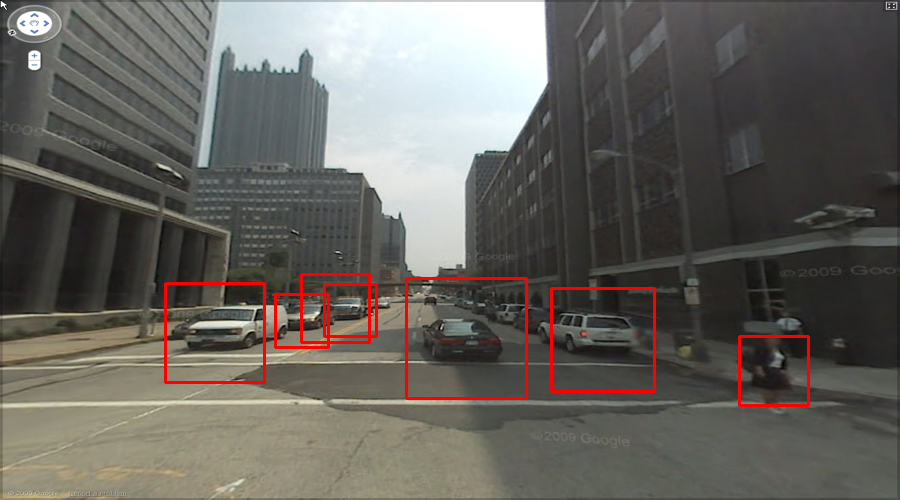

In [106]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

7  cars found


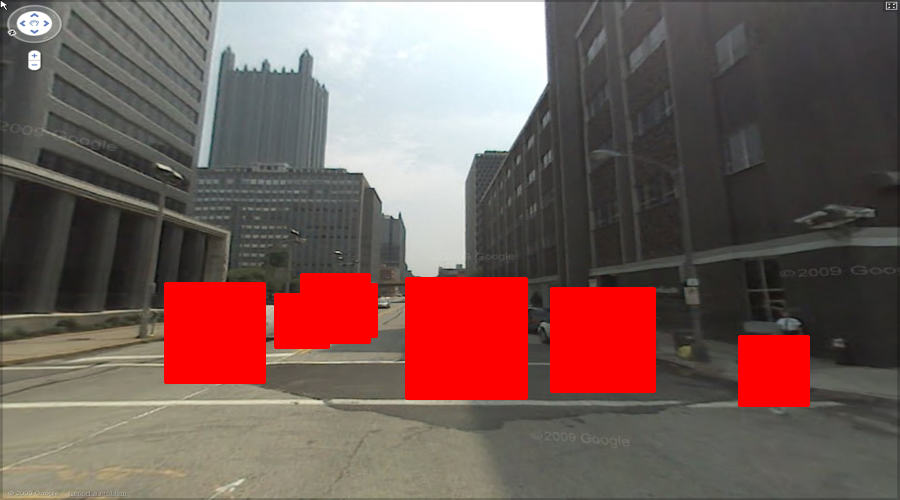

In [107]:
cnt = 0
for (x,y,w,h) in cars:
    thickness = -1
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),thickness)
    cnt += 1
print(cnt, " cars found")
detected_image=Image.fromarray(image_arr)
detected_image

In [122]:
def roi_blurring(image_name,cars_arr):
  img = cv2.imread(image_name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(900,500))
  final_image=Image.fromarray(img)
  for i in range(cars_arr.shape[0]):
    cropped_image = img[cars[i][1]:cars[i][1]+cars[i][3],cars[i][0]:cars[i][0]+cars[i][2]]
    blurred_image = Image.fromarray(cropped_image).filter(ImageFilter.GaussianBlur(10))
    final_image.paste(blurred_image, (cars[i][0], cars[i][1]))
  return final_image


In [123]:
final_blurred_image = roi_blurring(image_name,cars)

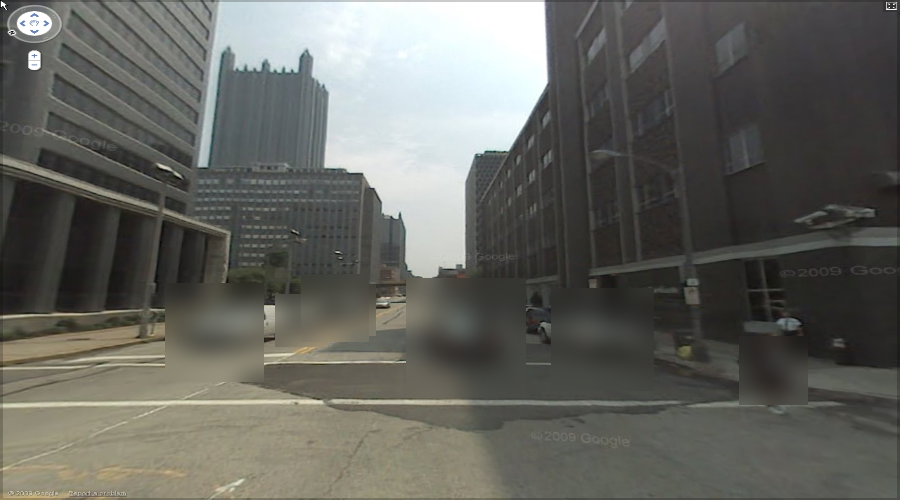

In [124]:
final_blurred_image

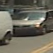

In [98]:
img = cv2.imread(image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(900,500))
#(x,y,w,h) [551, 288, 103, 103]
#crop_img = img[y:y+h, x:x+w]
i=1
cropped_image = img[cars[i][1]:cars[i][1]+cars[i][3],cars[i][0]:cars[i][0]+cars[i][2]]
Image.fromarray(cropped_image)

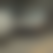

In [99]:
blurred_image = Image.fromarray(cropped_image).filter(ImageFilter.GaussianBlur(5))
blurred_image

In [100]:
img=Image.fromarray(img)
img.paste(blurred_image, (cars[i][0], cars[i][1]))

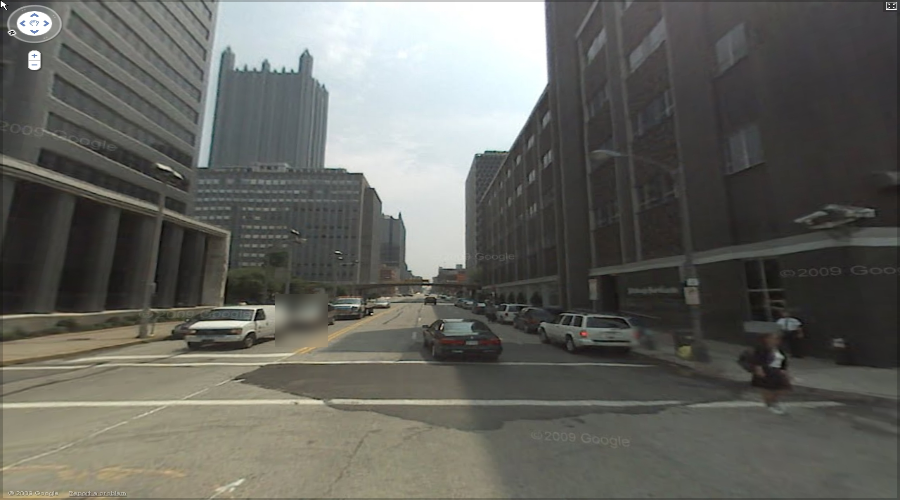

In [101]:
img

In [81]:
'''
import cv2
img = cv2.imread("lenna.png")
crop_img = img[y:y+h, x:x+w]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)
'''

'\nimport cv2\nimg = cv2.imread("lenna.png")\ncrop_img = img[y:y+h, x:x+w]\ncv2.imshow("cropped", crop_img)\ncv2.waitKey(0)\n'

In [114]:
pixValue=detected_image.getpixel((200,145))
pixValue

(150, 158, 160)

In [113]:
pixValue[2]

160

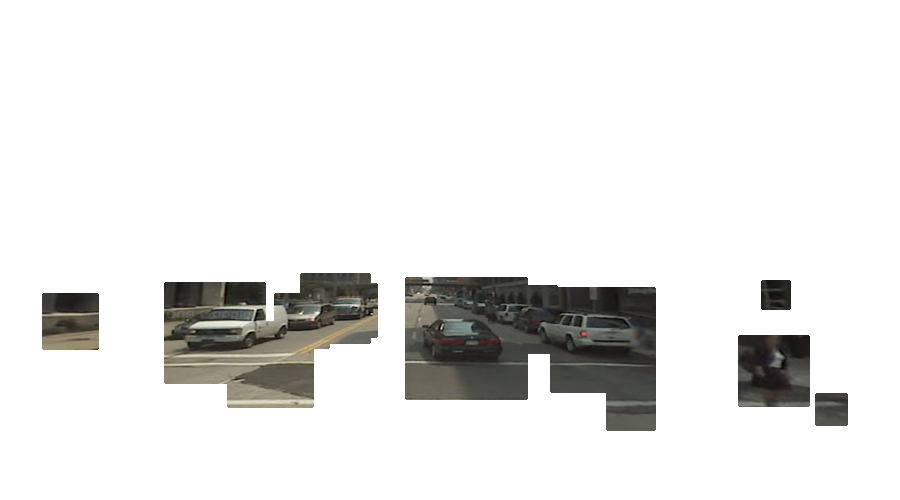

In [52]:
original_image = Image.open(image_name)
original_image = original_image.resize((900,500))
for x in range(detected_image.width):
  for y in range(detected_image.height):
    current_color = detected_image.getpixel((x,y))
    if current_color !=(255,0,0):
      original_image.putpixel((x,y),(255,255,255) )
original_image

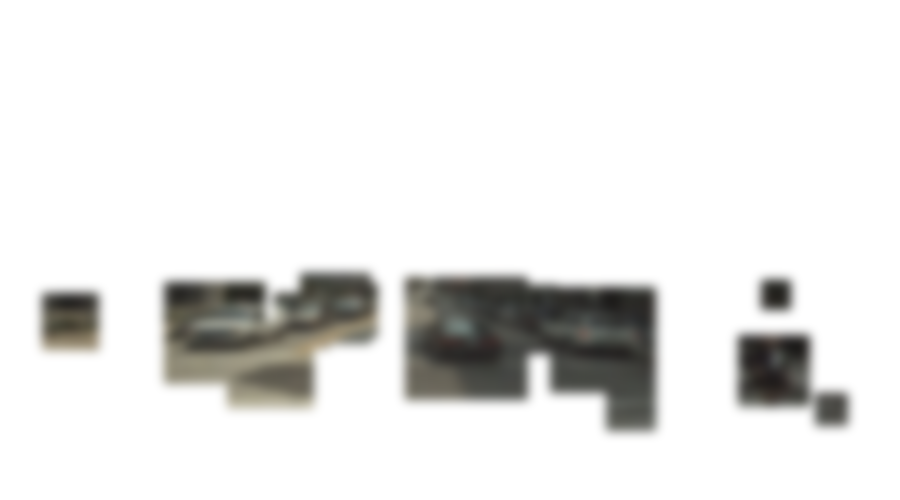

In [87]:
blur_image= original_image.filter(ImageFilter.GaussianBlur(5))
blur_image.save('gg.jpg')
blur_image

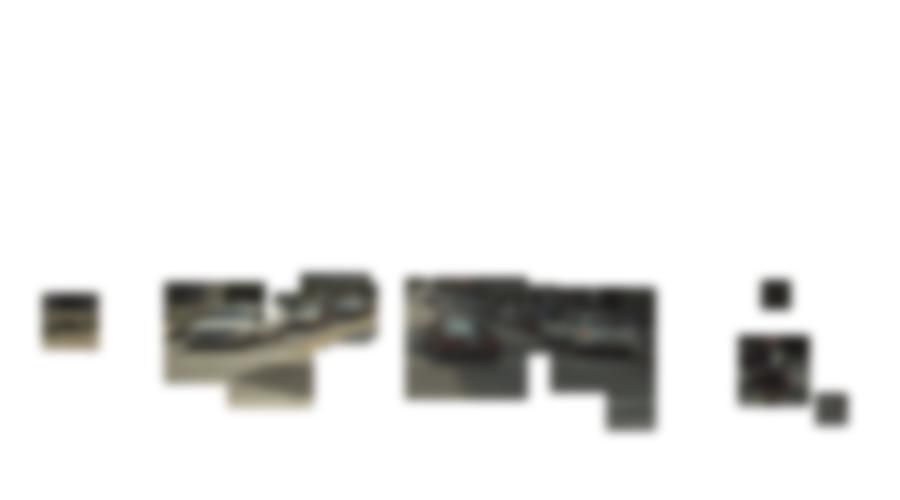

In [105]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('gg.jpg')
img2 = Image.open('gg.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
image_smooth = img2.filter(ImageFilter.ModeFilter(size=1))
#cv2_imshow(image_sharp)
#cv2.waitKey(0)
image_smooth

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
wide = cv2.Canny(img, 10, 200)
mid = cv2.Canny(img, 0, 0)
tight = cv2.Canny(img, 240, 250)
sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
edges = cv2.Canny(image=img, threshold1=50, threshold2=50) 

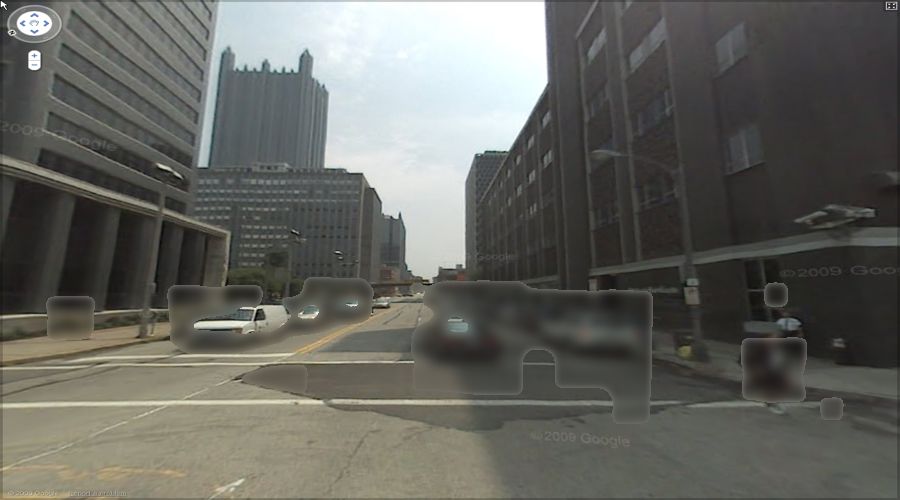

In [121]:
main_image = Image.open(image_name)
main_image = main_image.resize((900,500))
for x in range(original_image.width):
  for y in range(original_image.height):
    current_color = original_image.getpixel((x,y))
    if current_color!=(255,255,255):
      blur_pixel= blur_image.getpixel((x,y))
      flag = False
      for colorValue in blur_pixel:
        if colorValue<100:
          flag = True
      if flag == True:
        main_image.putpixel((x,y),blur_pixel)
main_image

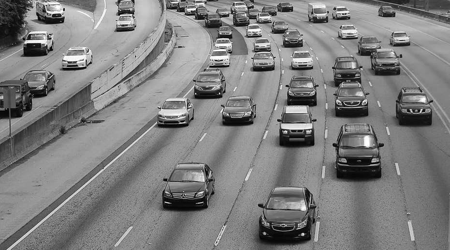

In [43]:
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)


In [44]:
blur = cv2.GaussianBlur(grey,(5,5),0)
dilated = cv2.dilate(blur,np.ones((3,3)))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[245,  24,  20,  20],
       [376,   1,  22,  22],
       [307,   4,  27,  27],
       [196,  10,  28,  28],
       [274,  20,  38,  38],
       [250,  35,  25,  25],
       [ 35,   2,  30,  30],
       [ 13,  25,  43,  43],
       [101,   3,  43,  43],
       [ 63,  40,  22,  22],
       [ 52,  44,  39,  39],
       [237,  38,  49,  49],
       [362,  43,  46,  46],
       [256,  52,  79,  79],
       [209,  88,  54,  54],
       [317,  66,  66,  66],
       [384,  84,  59,  59],
       [145,  91,  53,  53],
       [268, 106,  60,  60],
       [318, 121,  82,  82],
       [150, 163,  68,  68]], dtype=int32)

21  cars found


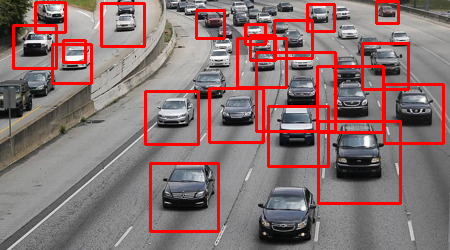

In [45]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)